In [1]:
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")


In [3]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:

# Create a logistic regression model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Drop string data
train = train.drop(["Name", "Ticket", "Cabin"], axis=1)
test = test.drop(["Name", "Ticket", "Cabin"], axis=1)

# change strings to numerical values
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
test["Sex"] = test["Sex"].map({"male": 1, "female": 0})
train["Embarked"] = train["Embarked"].map({"C": 0, "Q" : 1, "S" : 2})
test["Embarked"] = test["Embarked"].map({"C": 0, "Q" : 1, "S" : 2})

# separate out Survived column in our training data to be our y training set
y_train = train["Survived"]
X_train = train.drop(["Survived"], axis=1)

# fill in NAs
X_train= X_train.fillna((X_train.mean()))
test = test.fillna((test.mean()))

model = LogisticRegression(fit_intercept=True)

# Fit the model to your training data.
model.fit(X_train,y_train)


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [6]:
# Make and put together our predictions
y_pred = model.predict(test)
test["Survived"] = y_pred
test = test.drop(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], axis=1)
test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


(array([21., 21., 21., 21., 21., 21., 20., 21., 21., 21., 21., 21., 21.,
        20., 21., 21., 21., 21., 21., 21.]),
 array([ 892.  ,  912.85,  933.7 ,  954.55,  975.4 ,  996.25, 1017.1 ,
        1037.95, 1058.8 , 1079.65, 1100.5 , 1121.35, 1142.2 , 1163.05,
        1183.9 , 1204.75, 1225.6 , 1246.45, 1267.3 , 1288.15, 1309.  ]),
 <BarContainer object of 20 artists>)

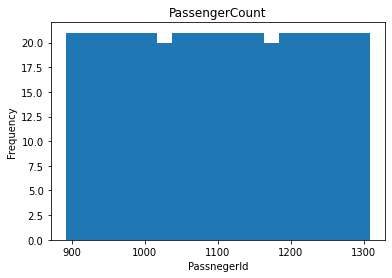

In [7]:
plt.xlabel('PassnegerId')
plt.ylabel('Frequency')
plt.title('PassengerCount')
plt.hist(test.PassengerId, bins=20)


(array([265., 153.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

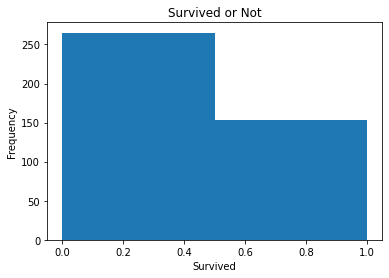

In [8]:
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Survived or Not')
plt.hist(test.Survived, bins=2)

In [9]:
test.to_csv('submission.csv', index=False)